In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading and Initial Exploration ---
print("Loading data...")
try:
    df = pd.read_csv(
        r'L:\Guvi\Power\household_power_consumption.txt',
        sep=';',
        na_values=['?'],
        dayfirst=True,
        parse_dates={'DateTime': ['Date', 'Time']}
    )
except FileNotFoundError:
    print("Error: household_power_consumption.txt not found. Make sure the file is in the correct path.")
    exit()

print("Data loaded successfully.")
print(f"Shape of the dataset: {df.shape}")
print(df.head())
print(df.info())


Loading data...


C:\Users\CARE\AppData\Local\Temp\ipykernel_4780\3111878268.py:15: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


Data loaded successfully.
Shape of the dataset: (2075259, 8)
             DateTime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [2]:
print("\nStarting Data Preprocessing...")

# 2.1 Handling Missing Values
print("Handling missing values...")
print(f"Missing values before imputation:\n{df.isnull().sum()}")
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())
print(f"Missing values after imputation:\n{df.isnull().sum()}")


Starting Data Preprocessing...
Handling missing values...
Missing values before imputation:
DateTime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Missing values after imputation:
DateTime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [3]:
# 2.2 Setting DateTime index
print("Setting DateTime index...")
df.set_index('DateTime', inplace=True)

Setting DateTime index...


In [4]:
# 2.3 Data Type Conversion
print("Converting data types...")
numeric_cols = df.columns
df[numeric_cols] = df[numeric_cols].astype('float32')
print(df.info())

Converting data types...
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB
None


In [5]:
# 2.4 Feature Engineering
print("Performing basic feature engineering...")
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month

print("Data Preprocessing complete.")

Performing basic feature engineering...
Data Preprocessing complete.


In [6]:
# --- 3. Exploratory Data Analysis (EDA) ---
print("\nStarting Exploratory Data Analysis (EDA)...")


Starting Exploratory Data Analysis (EDA)...


In [7]:
# 3.1 Summary Statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.050655e+00           1.120142e-01  3.219643e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.100000e-01           4.800000e-02  2.390200e+02   
50%           6.300000e-01           1.020000e-01  2.409600e+02   
75%           1.520000e+00           1.920000e-01  2.428600e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06   
mean       4.627759e+00    1.121923e+00    1.298519e+00    6.458445e+00   
std        4.416490e+00    6.114397e+00    5.785470e+00    8.384177e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
2

Creating visualizations...


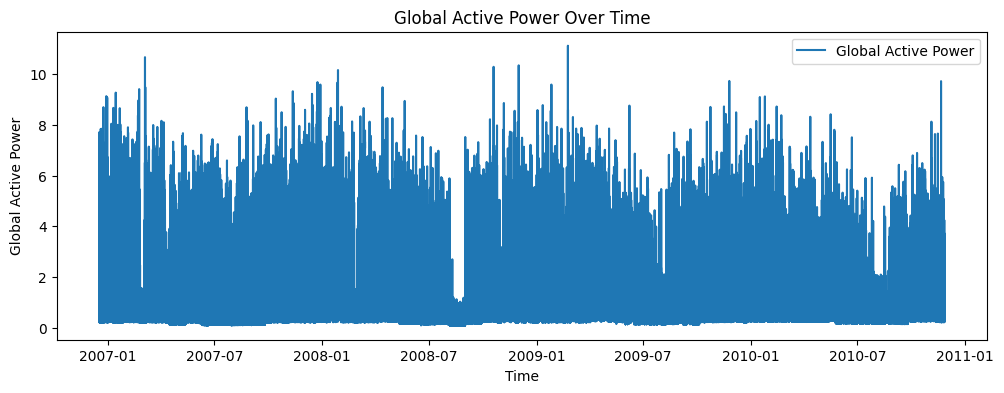

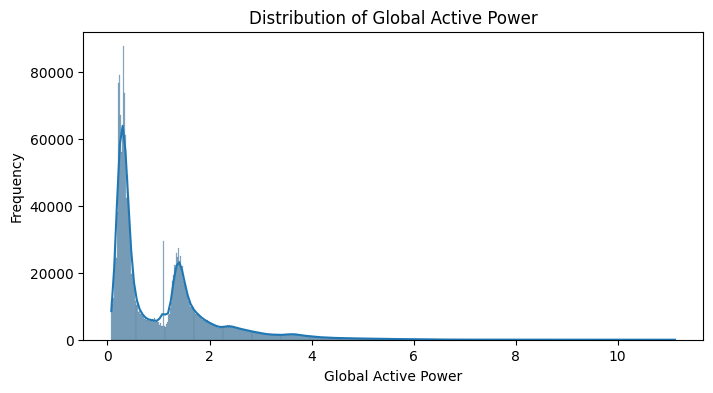

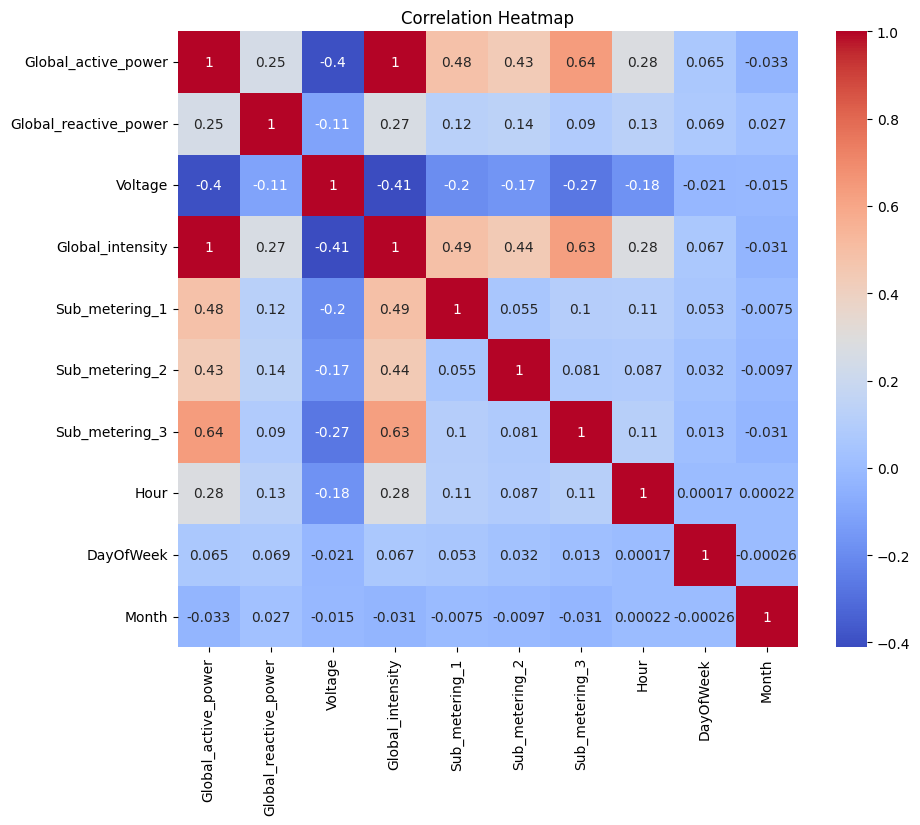

EDA complete.


In [8]:
# 3.2 Visualizations
print("Creating visualizations...")

plt.figure(figsize=(12, 4))
plt.plot(df['Global_active_power'], label='Global Active Power')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Global_active_power'], kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("EDA complete.")

In [9]:
# --- 4. Feature Selection and Data Splitting ---
print("\nPreparing data for modeling...")

X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']

# 4.1 Scaling
print("Scaling the data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Preparing data for modeling...
Scaling the data...


In [10]:
# 4.2 Train-Test Split
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Data preparation complete.")

Splitting data into training and testing sets...
Data preparation complete.


In [11]:
# --- 5. Model Training and Evaluation ---
def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R-squared: {r2:.4f}")

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    print(f"Cross-validation RMSE scores: {cv_rmse_scores}")
    print(f"Mean cross-validation RMSE: {cv_rmse_scores.mean():.4f}")

    return model, y_pred

print("\nStarting Model Training and Evaluation...")


Starting Model Training and Evaluation...


In [ ]:
# 5.1 Linear Regression
lr_model = LinearRegression()
lr_model, lr_y_pred = train_and_evaluate(lr_model, "Linear Regression", X_train, y_train, X_test, y_test)

# 5.2 Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model, rf_y_pred = train_and_evaluate(rf_model, "Random Forest Regressor", X_train, y_train, X_test, y_test)

# 5.3 Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model, gb_y_pred = train_and_evaluate(gb_model, "Gradient Boosting Regressor", X_train, y_train, X_test, y_test)

print("\nModel Training and Evaluation complete.")


Training Linear Regression...
Evaluating Linear Regression...
Linear Regression Metrics:
  RMSE: 0.0403
  MAE: 0.0255
  R-squared: 0.9985
Cross-validation RMSE scores: [0.04044732 0.04037597 0.0402162  0.04012663 0.04003845]
Mean cross-validation RMSE: 0.0402

Training Random Forest Regressor...
Evaluating Random Forest Regressor...
Random Forest Regressor Metrics:
  RMSE: 0.0262
  MAE: 0.0128
  R-squared: 0.9994


In [ ]:
# --- 6. Feature Importance ---
def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances, y=feature_importances.index)
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"Model {model_name} does not support feature importance analysis.")

print("\nAnalyzing Feature Importance...")
plot_feature_importance(rf_model, X.columns, "Random Forest Regressor")
plot_feature_importance(gb_model, X.columns, "Gradient Boosting Regressor")

In [ ]:
# --- 7. Results Visualization ---
print("\nVisualizing Results (Example)...")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

print("\n✅ Project completed. See plots and evaluation metrics above.")